<a href="https://colab.research.google.com/github/lakshit2808/Machine-Learning-Notes/blob/master/ML_Models/Classification/KNearestNeighbor/KNN_first_try.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# K-Nearest Neighbor
**K-Nearest Neighbors** is an algorithm for supervised learning. Where the data is 'trained' with data points corresponding to their classification. Once a point is to be predicted, it takes into account the 'K' nearest points to it to determine it's classification.


### Here's an visualization of the K-Nearest Neighbors algorithm.

<img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%203/images/KNN_Diagram.png">


In this case, we have data points of Class A and B. We want to predict what the star (test data point) is. If we consider a k value of 3 (3 nearest data points) we will obtain a prediction of Class B. Yet if we consider a k value of 6, we will obtain a prediction of Class A.<br><br>
In this sense, it is important to consider the value of k. But hopefully from this diagram, you should get a sense of what the K-Nearest Neighbors algorithm is. It considers the 'K' Nearest Neighbors (points) when it predicts the classification of the test point.



## 1. Importing Libraries

In [ ]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
from sklearn import preprocessing

## 2. Reading Data

In [ ]:
df = pd.read_csv('teleCust.csv')
df.head()

,region,tenure,age,marital,address,income,ed,employ,retire,gender,reside,custcat
0,2,13,44,1,9,64.0,4,5,0.0,0,2,1
1,3,11,33,1,7,136.0,5,5,0.0,0,6,4
2,3,68,52,1,24,116.0,1,29,0.0,1,2,3
3,2,33,33,0,12,33.0,2,0,0.0,1,1,1
4,2,23,30,1,9,30.0,1,2,0.0,0,4,3


## 3. Data Visualization and Analysis
#### Let’s see how many of each class is in our data set


In [ ]:
df['custcat'].value_counts()

3    281
1    266
4    236
2    217
Name: custcat, dtype: int64

The target field, called **custcat**, has four possible values that correspond to the four customer groups, as follows:
  1. Basic Service
  2. E-Service
  3. Plus Service
  4. Total Service


array([[<AxesSubplot:title={'center':'income'}>]], dtype=object)

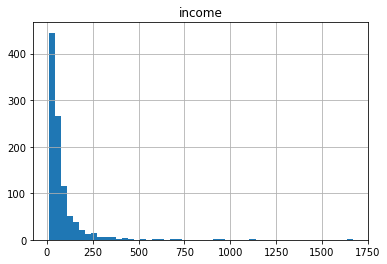

In [ ]:
df.hist(column='income' , bins=50)

### Feature Set
Let's Define a feature set: X

In [ ]:
df.columns

Index(['region', 'tenure', 'age', 'marital', 'address', 'income', 'ed',
       'employ', 'retire', 'gender', 'reside', 'custcat'],
      dtype='object')

To use scikit-learn library, we have to convert the Pandas data frame to a Numpy array:


In [ ]:
X = df[['region', 'tenure', 'age', 'marital', 'address', 'income', 'ed',
       'employ', 'retire', 'gender', 'reside']].values
X[0:5]

array([[  2.,  13.,  44.,   1.,   9.,  64.,   4.,   5.,   0.,   0.,   2.],
       [  3.,  11.,  33.,   1.,   7., 136.,   5.,   5.,   0.,   0.,   6.],
       [  3.,  68.,  52.,   1.,  24., 116.,   1.,  29.,   0.,   1.,   2.],
       [  2.,  33.,  33.,   0.,  12.,  33.,   2.,   0.,   0.,   1.,   1.],
       [  2.,  23.,  30.,   1.,   9.,  30.,   1.,   2.,   0.,   0.,   4.]])

What are our labels?

In [ ]:
y = df['custcat'].values
y[0:5]

array([1, 4, 3, 1, 3], dtype=int64)

### Normalize Data
Normalization in this case essentially means standardization. Standardization is the process of transforming data based on the mean and standard deviation for the whole set. Thus, transformed data refers to a standard distribution with a mean of 0 and a variance of 1.<br><br>
Data Standardization give data zero mean and unit variance, it is good practice, especially for algorithms such as KNN which is based on distance of cases:


In [ ]:
X = preprocessing.StandardScaler().fit(X).transform(X.astype(float))
X[0:5]

array([[-0.02696767, -1.055125  ,  0.18450456,  1.0100505 , -0.25303431,
        -0.12650641,  1.0877526 , -0.5941226 , -0.22207644, -1.03459817,
        -0.23065004],
       [ 1.19883553, -1.14880563, -0.69181243,  1.0100505 , -0.4514148 ,
         0.54644972,  1.9062271 , -0.5941226 , -0.22207644, -1.03459817,
         2.55666158],
       [ 1.19883553,  1.52109247,  0.82182601,  1.0100505 ,  1.23481934,
         0.35951747, -1.36767088,  1.78752803, -0.22207644,  0.96655883,
        -0.23065004],
       [-0.02696767, -0.11831864, -0.69181243, -0.9900495 ,  0.04453642,
        -0.41625141, -0.54919639, -1.09029981, -0.22207644,  0.96655883,
        -0.92747794],
       [-0.02696767, -0.58672182, -0.93080797,  1.0100505 , -0.25303431,
        -0.44429125, -1.36767088, -0.89182893, -0.22207644, -1.03459817,
         1.16300577]])

## 4. Train/Test Split 

In [ ]:
from sklearn.model_selection import train_test_split
X_train , X_test , y_train , y_test = train_test_split(X , y , test_size= 0.2 , random_state = 4)

print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (800, 11) (800,)
Test set: (200, 11) (200,)


## 5. Classification(KNN)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

### Training
Lets start the algorithm with k=4 for now:

In [ ]:
all_acc = []

for i in range(1, 100):
    KNN = KNeighborsClassifier(n_neighbors=i).fit(X_train , y_train)
    all_acc.append(accuracy_score(y_test , KNN.predict(X_test)))
    
best_acc = max(all_acc)
best_k = all_acc.index(best_acc) + 1

KNN = KNeighborsClassifier(n_neighbors=best_k).fit(X_train , y_train)

### Prediction

In [ ]:
y_ = KNN.predict(X_test)
y_[0:5]

array([3, 1, 2, 4, 4], dtype=int64)

## 6. Accuracy Evaluation 
In multilabel classification, **accuracy classification score** is a function that computes subset accuracy. This function is equal to the jaccard_score function. Essentially, it calculates how closely the actual labels and predicted labels are matched in the test set.

In [ ]:
from sklearn.metrics import accuracy_score
print('Train Set Accuracy: {}'.format(accuracy_score(y_train , KNN.predict(X_train))))
print('Ttest Set Accuracy: {}'.format(accuracy_score(y_test , KNN.predict(X_test))))

Train Set Accuracy: 0.4275
Ttest Set Accuracy: 0.41


#### What about other K?

K in KNN, is the number of nearest neighbors to examine. It is supposed to be specified by the User. So, how can we choose right value for K?
The general solution is to reserve a part of your data for testing the accuracy of the model. Then chose k =1, use the training part for modeling, and calculate the accuracy of prediction using all samples in your test set. Repeat this process, increasing the k, and see which k is the best for your model.

We can calculate the accuracy of KNN for different K.


In [ ]:
all_acc = []

for i in range(1, 100):
    KNN = KNeighborsClassifier(n_neighbors=i).fit(X_train , y_train)
    all_acc.append(accuracy_score(y_test , KNN.predict(X_test)))
    
best_acc = max(all_acc)
best_k = all_acc.index(best_acc) + 1
